In [172]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline

## Question 1.  (40 pts)

This is an artificial data set. It has five features and let's explore clustering models on this data set.

In [173]:
data1=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/data1.csv")
data1.head()

,0,1,2,3,4
0,7.041668,0.679020,-8.408575,3.461746,-5.597806
1,-4.816582,-0.430385,0.753123,0.264526,3.965808
2,4.096806,-6.559957,-4.302680,-5.615232,5.635794
3,4.962203,-6.756521,-5.252219,-6.075322,2.754351
4,7.039362,0.263419,-7.505487,1.981984,-10.156349


#### 1. Visualize the data1 using PCA on a two dimensional plane and guess the number of clusters we could have from the plot. (5 pts)

In [174]:
from scipy import stats
# PCA module
from sklearn.decomposition import PCA

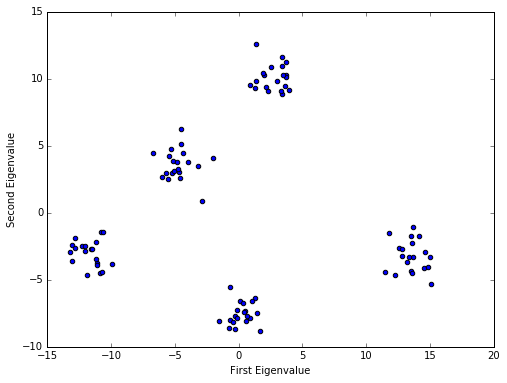

In [175]:
X=np.asarray(data1)
n=5
pca = PCA(n)
Xproj = pca.fit_transform(X)
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1])
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

#### We could guess there are five clusters.

#### 2. Use silhouette_score and elbow method to justify the optimal number k of clusters for K-means clustering. Report the k and give a short explanation. (15 pts)

In [176]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist, pdist
import matplotlib.cm as cm

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

('For n_clusters =', 3, 'The average silhouette_score is :', 0.54406252065286009)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.64763455444541163)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.75584384906559587)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.66568460988849953)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.54165758185003976)


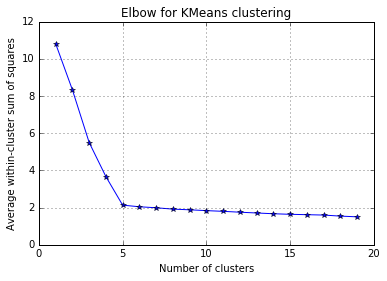

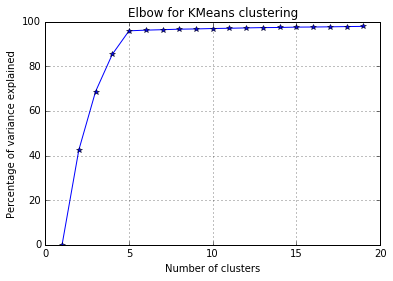

In [177]:
range_n_clusters = [3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

#### K should be 5 because we can see from the silhouette_score report that when k equal 5 the coefficient is the largest, and in the elbow methed the SSE decreases abruptly when cluster K equals 5.

#### 3. Use K-means to cluster the data1 by the proper number of clusters k you found and report your result. (5 pts) 

In [178]:
n=5 # number of clusters
dd=X #data

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[3 2 1 1 3 1 0 4 2 4 3 0 2 3 0 4 0 3 2 0 2 3 4 4 3 0 0 4 4 0 2 2 0 3 2 2 0
 1 2 4 3 1 4 4 0 1 2 1 1 4 2 0 0 4 1 3 3 2 3 1 4 3 0 2 1 3 3 3 4 2 3 0 1 1
 1 2 2 4 0 2 2 1 0 4 1 4 4 4 3 1 1 1 1 3 0 3 0 4 2 0]


#### use  K - means to  cluster the data by 5 and we can see the labels assign to each data point.

#### 4.  Visualize the clustering result. Please use the plot from part 1 and color the points by the new labels (the clustering results). (5 pts)

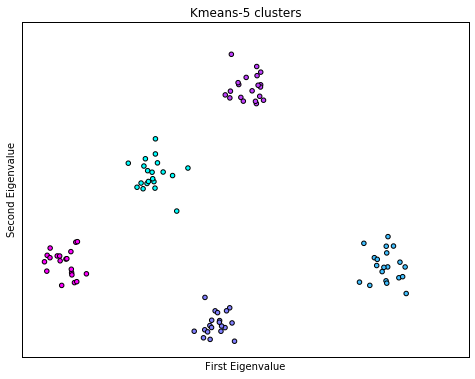

In [179]:
#Plot
plt.figure(figsize=(8, 6))

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

#### 5. Use Guassian Mixture model instead of K-means with the same k and repeat the part 3 and 4. (10 pts)

In [180]:
n=5 # number of clusters
dd=X #data

from sklearn.mixture import GaussianMixture 
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)

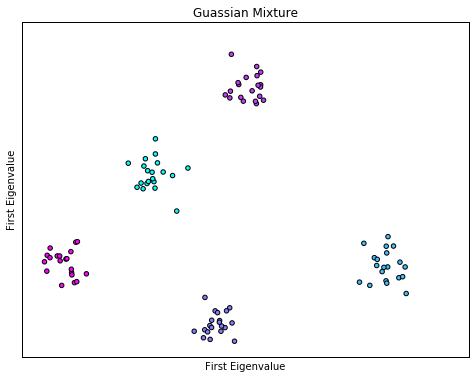

In [181]:
plt.figure(figsize=(8,6))

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('First Eigenvalue')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

## Question 2 : (30 pts)

This homework assignment concerns NYPD police stops in New York City in the years 
2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can 
read more about these stops at 

https://en.wikipedia.org/wiki/Terry_stop 

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City 

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but 
unfortunately technical errors have resulted in some exact duplicate records.  You know 
there are around 1,000 unique stops in the file (there may be slightly more or slightly 
fewer).   


In [277]:
data2=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_duplicates_noid.csv")

data2.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6


In [280]:
data2['suspect.build'] = data2['suspect.build'].map({'thin': 1, 'medium': 2, 'heavy' : 3, 'muscular' : 4, 'unknown' : 0})
data2['suspect.sex'] = data2['suspect.sex'].map({'female': 0, 'male': 1})
data2['location.housing'] = data2['location.housing'].map({'neither': 0, 'housing': 1, 'transit' : 2})
data2['suspect.race'] = data2['suspect.race'].map({'black': 1, 'asian': 2, 'hispanic' : 3, 'white': 4, 'native.american' : 5 ,'other' : 0 })
data2['day'] = data2['day'].map({'Sunday': 0, 'Monday': 1, 'Tuesday' : 2, 'Wednesday': 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6})
data2['month'] = data2['month'].map({'January': 1, 'February': 3, 'March' : 3, 'April': 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August': 8, 'September': 9, 'October' : 10, 'November': 11, 'December' : 12})

In [272]:
#inds = pd.isnull(data2).any(1).nonzero()[0]
#inds

In [ ]:
for i in range(len(data2.columns)):
    print (data2.iloc[:,i].name, data2.iloc[:,i].dtype)

#### 1. Use a clustering technique of your choice to determine how many unique records there are. (15 pts)

In [281]:
X=np.asarray(data2)
range_n_clusters = [995, 996, 997, 998, 999, 1000, 1001, 10002, 1003, 1004, 1005]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

('For n_clusters =', 995, 'The average silhouette_score is :', 0.13607004924223462)
('For n_clusters =', 996, 'The average silhouette_score is :', 0.1350584816614456)
('For n_clusters =', 997, 'The average silhouette_score is :', 0.13470533208606175)
('For n_clusters =', 998, 'The average silhouette_score is :', 0.13470533208606175)
('For n_clusters =', 999, 'The average silhouette_score is :', 0.13470533208606175)
('For n_clusters =', 1000, 'The average silhouette_score is :', 0.13470533208606175)
('For n_clusters =', 1001, 'The average silhouette_score is :', 0.13470533208606175)


ValueError: n_samples=1069 should be >= n_clusters=10002

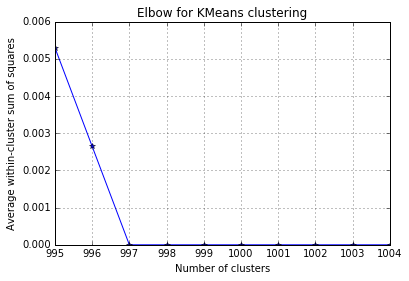

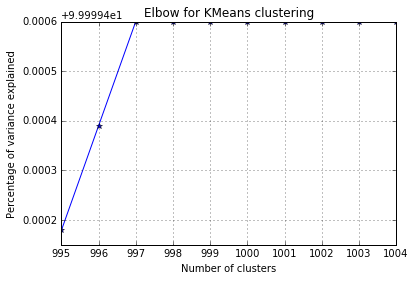

In [283]:
elbow(X,range(995,1005))

#### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?  (5 pts)

In [282]:
datauni = data2.drop_duplicates()
len(datauni)

997

### The elbow method performs very precisely but the Silhouette Coefficient is not so obvious to pick a K value.

#### 3. Write a paragraph explaining what you did in parts a) and b)  (10 pts)

### I list all the columns to find out about their data type and apply a numeric type to all the string object in the dataframe and carefully replace them all without fill a nan. 
### When using the Silhouette Coefficient to justify the the clustering, the coefficient is very close of each K. The highest coefficient dose not denote the real number of unique records. I can feel the compuation is very large when testing the Ks and it crush in the middle with some error. However the elbow method computes much faster and get the elbow point 997 very precisely.

### Question 3: 311 data (30 pts)

The 311 data is not new for us. Let us use the scaled 311 data for question 3.

Be careful! The first three columns are : zip code(zip_code), the average income(mean), and the average housing price(sale_price) 

In [284]:
data3=pd.read_csv("http://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/HW4_Q3.csv")
data3=pd.concat((data3.loc[:,["zip","mean","sale_price"]],data3.loc[:,"Adopt A Basket":]),axis=1)
data3.head(3)

,zip,mean,sale_price,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,Asbestos,BEST Site Safety,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,10001,123112.0,1950000.0,0.000000,0.001253,0.004762,0.000000,0.000251,0.004637,0.000376,...,0.0,0.000125,0.005263,0.001003,0.004511,0.001378,0.000000,0.046115,0.0,0.0
1,10002,NaN,NaN,0.000081,0.000486,0.003730,0.000000,0.000811,0.001622,0.000405,...,0.0,0.000324,0.003892,0.004784,0.006649,0.000730,0.000243,0.030649,0.0,0.0
2,10003,139330.0,4981025.0,0.000000,0.000740,0.004935,0.000247,0.000576,0.002303,0.000329,...,0.0,0.000000,0.003948,0.003043,0.010527,0.000658,0.000576,0.029114,0.0,0.0


#### 1. Use Kmeans clustering model to cluster NYC zip codes into FOUR clusters. The feature space is the scaled 311 complaints data (from "Adopt A Basket" to the end. Please do not include "mean" and "sale_price" ) as provided.  Report the number of zip codes in each clusters. (10 pts)

In [285]:
n=4 # number of clusters

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
KM.fit(data3.iloc[:,3:])
res=KM.predict(data3.iloc[:,3:])

#merge the result with zipcodes for graph plotting
res_KM=pd.concat((data3.loc[:,'zip'],pd.DataFrame(res)),axis=1)
res_KM.head()


,zip,0
0,10001,3
1,10002,3
2,10003,3
3,10004,3
4,10005,3


In [286]:
one = len(res_KM[res_KM.loc[:,0] == 0])
two = len(res_KM[res_KM.loc[:,0] == 1])
three = len(res_KM[res_KM.loc[:,0] == 2])
four = len(res_KM[res_KM.loc[:,0] == 3])
print ("number of zipcodes in each clusters: {} {} {} {} " .format(one, two, three, four))

number of zipcodes in each clusters: 45 24 78 31 


#### 2. Calculate the average income and average housing price for each cluster you get from part 1. (10 pts)

In [287]:
dt = pd.concat((data3.loc[:,'mean':'sale_price'],pd.DataFrame(res_KM)),axis=1)

In [288]:
mean1 = dt.loc[:,'mean'][dt.loc[:,0] == 0].mean()
housep1 = dt.loc[:,'sale_price'][dt.loc[:,0] == 0].mean()
print ('Cluster one average income: {}, average housing price: {}' .format(mean1, housep1))

mean2 = dt.loc[:,'mean'][dt.loc[:,0] == 1].mean()
housep2 = dt.loc[:,'sale_price'][dt.loc[:,0] == 1].mean()
print ('Cluster two average income: {}, average housing price: {}' .format(mean1, housep1))

mean3 = dt.loc[:,'mean'][dt.loc[:,0] == 2].mean()
housep3 = dt.loc[:,'sale_price'][dt.loc[:,0] == 2].mean()
print ('Cluster three average income: {}, average housing price: {}' .format(mean1, housep1))

mean4 = dt.loc[:,'mean'][dt.loc[:,0] == 3].mean()
housep4 = dt.loc[:,'sale_price'][dt.loc[:,0] == 3].mean()
print ('Cluster four average income: {}, average housing price: {}' .format(mean1, housep1))

Cluster one average income: 49587.1071429, average housing price: 602630.677087
Cluster two average income: 49587.1071429, average housing price: 602630.677087
Cluster three average income: 49587.1071429, average housing price: 602630.677087
Cluster four average income: 49587.1071429, average housing price: 602630.677087


#### 3. Visulize the clustering result on the map (For this part you need to use the shapefiles of NY).  (10 pts)

In [289]:
#import shapefile
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

zipsf = shp.Reader('NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

#for plotting our result
def plot_on_map(result):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'zip']
        x[key]=result.loc[i,0]

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+1))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("clustering result on map")

    import matplotlib.patches as mpatches
    clum_num=len(result.iloc[:,-1].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.show()

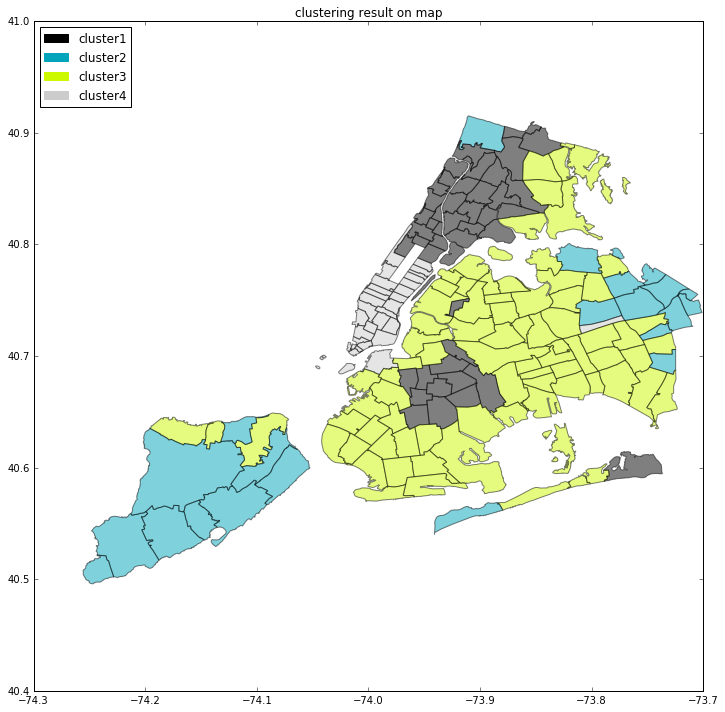

In [290]:
plot_on_map(res_KM)

#### Bonus question. (30 pts)
Continue from Question 2:

You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but 
unfortunately technical errors have resulted in some almost duplicate records (that is, 
there are some records that are duplicates of others except for slight variations in two 
features).  You know there are around 1,000 unique stops in the file (there may be 
slightly more or slightly fewer). 



In [291]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_errors_noid.csv")
data4.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4


#### 1. Which are the two features where errors were introduced? (15 pts) 

#### 2. How many unique records there are? (10 pts)

#### 3. Write a paragraph explaining what you did. (5 pts)

In [293]:
data4['suspect.build'] = data4['suspect.build'].map({'thin': 1, 'medium': 2, 'heavy' : 3, 'muscular' : 4, 'unknown' : 0})
data4['suspect.sex'] = data4['suspect.sex'].map({'female': 0, 'male': 1})
data4['location.housing'] = data4['location.housing'].map({'neither': 0, 'housing': 1, 'transit' : 2})
data4['suspect.race'] = data4['suspect.race'].map({'black': 1, 'asian': 2, 'hispanic' : 3, 'white': 4, 'native.american' : 5 ,'other' : 0 })
data4['day'] = data4['day'].map({'Sunday': 0, 'Monday': 1, 'Tuesday' : 2, 'Wednesday': 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6})
data4['month'] = data4['month'].map({'January': 1, 'February': 3, 'March' : 3, 'April': 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August': 8, 'September': 9, 'October' : 10, 'November': 11, 'December' : 12})

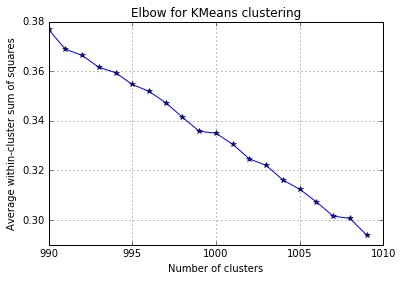

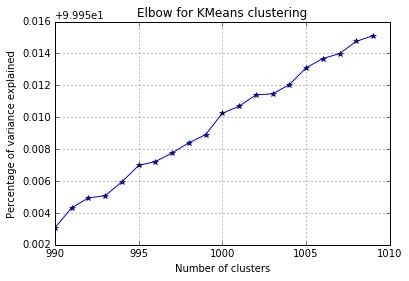

In [295]:
X=np.asarray(data4)
elbow(X,range(990,1010))

### There are 1000 unique records.